<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#realtime-test" data-toc-modified-id="realtime-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>realtime test</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>plot</a></span></li></ul></div>

Try id #259

In [1]:
import sys
sys.path.append('..')

In [2]:
import taiko as tk
from taiko.play import *
from taiko.performance import *

from sklearn.model_selection import train_test_split
import lightgbm as lgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import posixpath
from skimage.io import imshow, imsave, imread
import os

sns.set(font_scale=1.5)

Using TensorFlow backend.


In [3]:
record_files = glob('../data/alpha/*/*/record_table.csv')
record_dfs = []
for record_file_path in record_files:
    record_df = pd.read_csv(record_file_path)
    record_dfs.append(record_df)
record_df = pd.concat(record_dfs, ignore_index=True)

record_df = record_df[(record_df['song_id'] >= 1) & (record_df['song_id'] <= 4)]
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
1,aaaaa,1,L_2018-09-28_111304.csv,R_2018-09-28_111305.csv,capture_2018_09_28_11_13_05
2,aaaaa,2,L_2018-09-28_111610.csv,R_2018-09-28_111611.csv,capture_2018_09_28_11_16_11
3,aaaaa,3,L_2018-09-28_111936.csv,R_2018-09-28_111937.csv,capture_2018_09_28_11_19_37
4,aaaaa,4,L_2018-09-28_112353.csv,R_2018-09-28_112355.csv,capture_2018_09_28_11_23_55
5,aaaaa,1,L_2018-09-28_112912.csv,R_2018-09-28_112913.csv,capture_2018_09_28_11_29_13
6,aaaaa,2,L_2018-09-28_113242.csv,R_2018-09-28_113244.csv,capture_2018_09_28_11_32_44
7,aaaaa,3,L_2018-09-28_113531.csv,R_2018-09-28_113532.csv,capture_2018_09_28_11_35_32
8,aaaaa,4,L_2018-09-28_113909.csv,R_2018-09-28_113910.csv,capture_2018_09_28_11_39_10
9,aaaaa,1,L_2018-09-28_114340.csv,R_2018-09-28_114340.csv,capture_2018_09_28_11_43_41
10,aaaaa,2,L_2018-09-28_114710.csv,R_2018-09-28_114713.csv,capture_2018_09_28_11_47_13


In [4]:
record_row = record_df.loc[259]
play = get_play(record_row)
pf = get_performance(play)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


# realtime test

In [5]:
train_df = pf

x = train_df.drop('timestamp', axis=1)
ts = train_df['timestamp']
train_df

,timestamp,L_A_AI,R_A_AI,L_G_AI,R_G_AI,L_AX_AI,R_AX_AI,L_AY_AI,R_AY_AI,L_AZ_AI,...,L_AYZ_CORR,R_AYZ_CORR,L_AZX_CORR,R_AZX_CORR,L_GXY_CORR,R_GXY_CORR,L_GYZ_CORR,R_GYZ_CORR,L_GZX_CORR,R_GZX_CORR
0,1.538221e+09,-0.431963,-0.449059,-0.999933,-1.476406,-0.133374,-0.237251,-0.713688,-0.394419,-0.374033,...,0.00,0.05,0.20,0.00,-0.216008,-0.323426,0.575476,0.165035,0.215756,0.461451
1,1.538221e+09,-0.436691,-0.435230,-0.700043,-1.425404,0.096229,-0.105055,-0.845881,-0.441907,-0.401611,...,0.00,0.10,0.20,0.05,-0.159143,-0.491409,0.579418,-0.042157,0.480317,-0.786916
2,1.538221e+09,-0.450166,-0.485439,-0.631422,-1.333171,0.122603,0.052711,-0.537561,-0.421147,-0.426024,...,0.00,0.05,0.15,0.15,0.112044,-0.687607,-0.551308,-0.314423,0.561731,-0.458695
3,1.538221e+09,-0.510279,-0.551637,-0.700001,-1.168970,-0.219720,-0.015200,-0.083919,-0.214599,-0.483470,...,0.00,0.05,0.10,0.05,-0.612853,-0.391315,0.322680,0.008994,0.202417,0.431835
4,1.538221e+09,-0.550661,-0.598285,-0.841824,-1.086457,-0.546989,-0.022085,0.054242,-0.066339,-0.513558,...,0.00,0.05,0.05,0.10,-0.476374,-0.513758,0.480751,-0.520173,0.645309,-0.358547
5,1.538221e+09,-0.563699,-0.621237,-0.863382,-1.052411,-0.626788,0.067824,-0.007517,-0.020436,-0.525366,...,0.00,0.00,0.00,0.10,-0.484582,-0.380982,-0.081074,0.015672,-0.380786,0.722415
6,1.538221e+09,-0.587479,-0.593095,-0.710112,-1.012732,-0.674890,0.101094,0.049704,-0.125420,-0.559293,...,0.00,0.00,0.10,0.05,-0.212819,-0.307646,-0.303725,0.192479,0.673729,0.565007
7,1.538221e+09,-0.547273,-0.513643,-0.671478,-0.949236,-0.388518,-0.107315,0.329214,-0.222972,-0.542657,...,0.00,0.00,0.20,0.15,-0.511170,-0.502191,-0.046097,-0.093869,-0.423925,0.178744
8,1.538221e+09,-0.527488,-0.471180,-0.653946,-0.950829,-0.246025,-0.411100,0.451620,0.005304,-0.529952,...,0.00,0.10,0.15,0.20,-0.811349,-0.804125,0.791824,0.732534,-0.352769,-0.228187
9,1.538221e+09,-0.557928,-0.441464,-0.646866,-1.014790,-0.454991,-0.626714,0.335581,0.244527,-0.544151,...,0.00,0.10,0.15,0.15,-0.730893,-0.616563,0.557703,0.939432,-0.080904,-0.230727


In [6]:
# load model to predict
model = lgb.Booster(model_file='lgbm_model.h5')

y_pred = model.predict(x, num_iteration=model.best_iteration)

In [7]:
y_test = []
for y_pred in [y_pred]:
    predictions = []
    for x in y_pred:
        predictions.append(np.argmax(x))
    y_test.append(pd.Series(data=predictions))

In [8]:
pred_df = pd.DataFrame(data={
    'timestamp': ts,
    'hit_type': y_test[0]
})
pred_df

,timestamp,hit_type
0,1.538221e+09,1
1,1.538221e+09,1
2,1.538221e+09,1
3,1.538221e+09,1
4,1.538221e+09,1
5,1.538221e+09,1
6,1.538221e+09,2
7,1.538221e+09,2
8,1.538221e+09,5
9,1.538221e+09,1


# plot

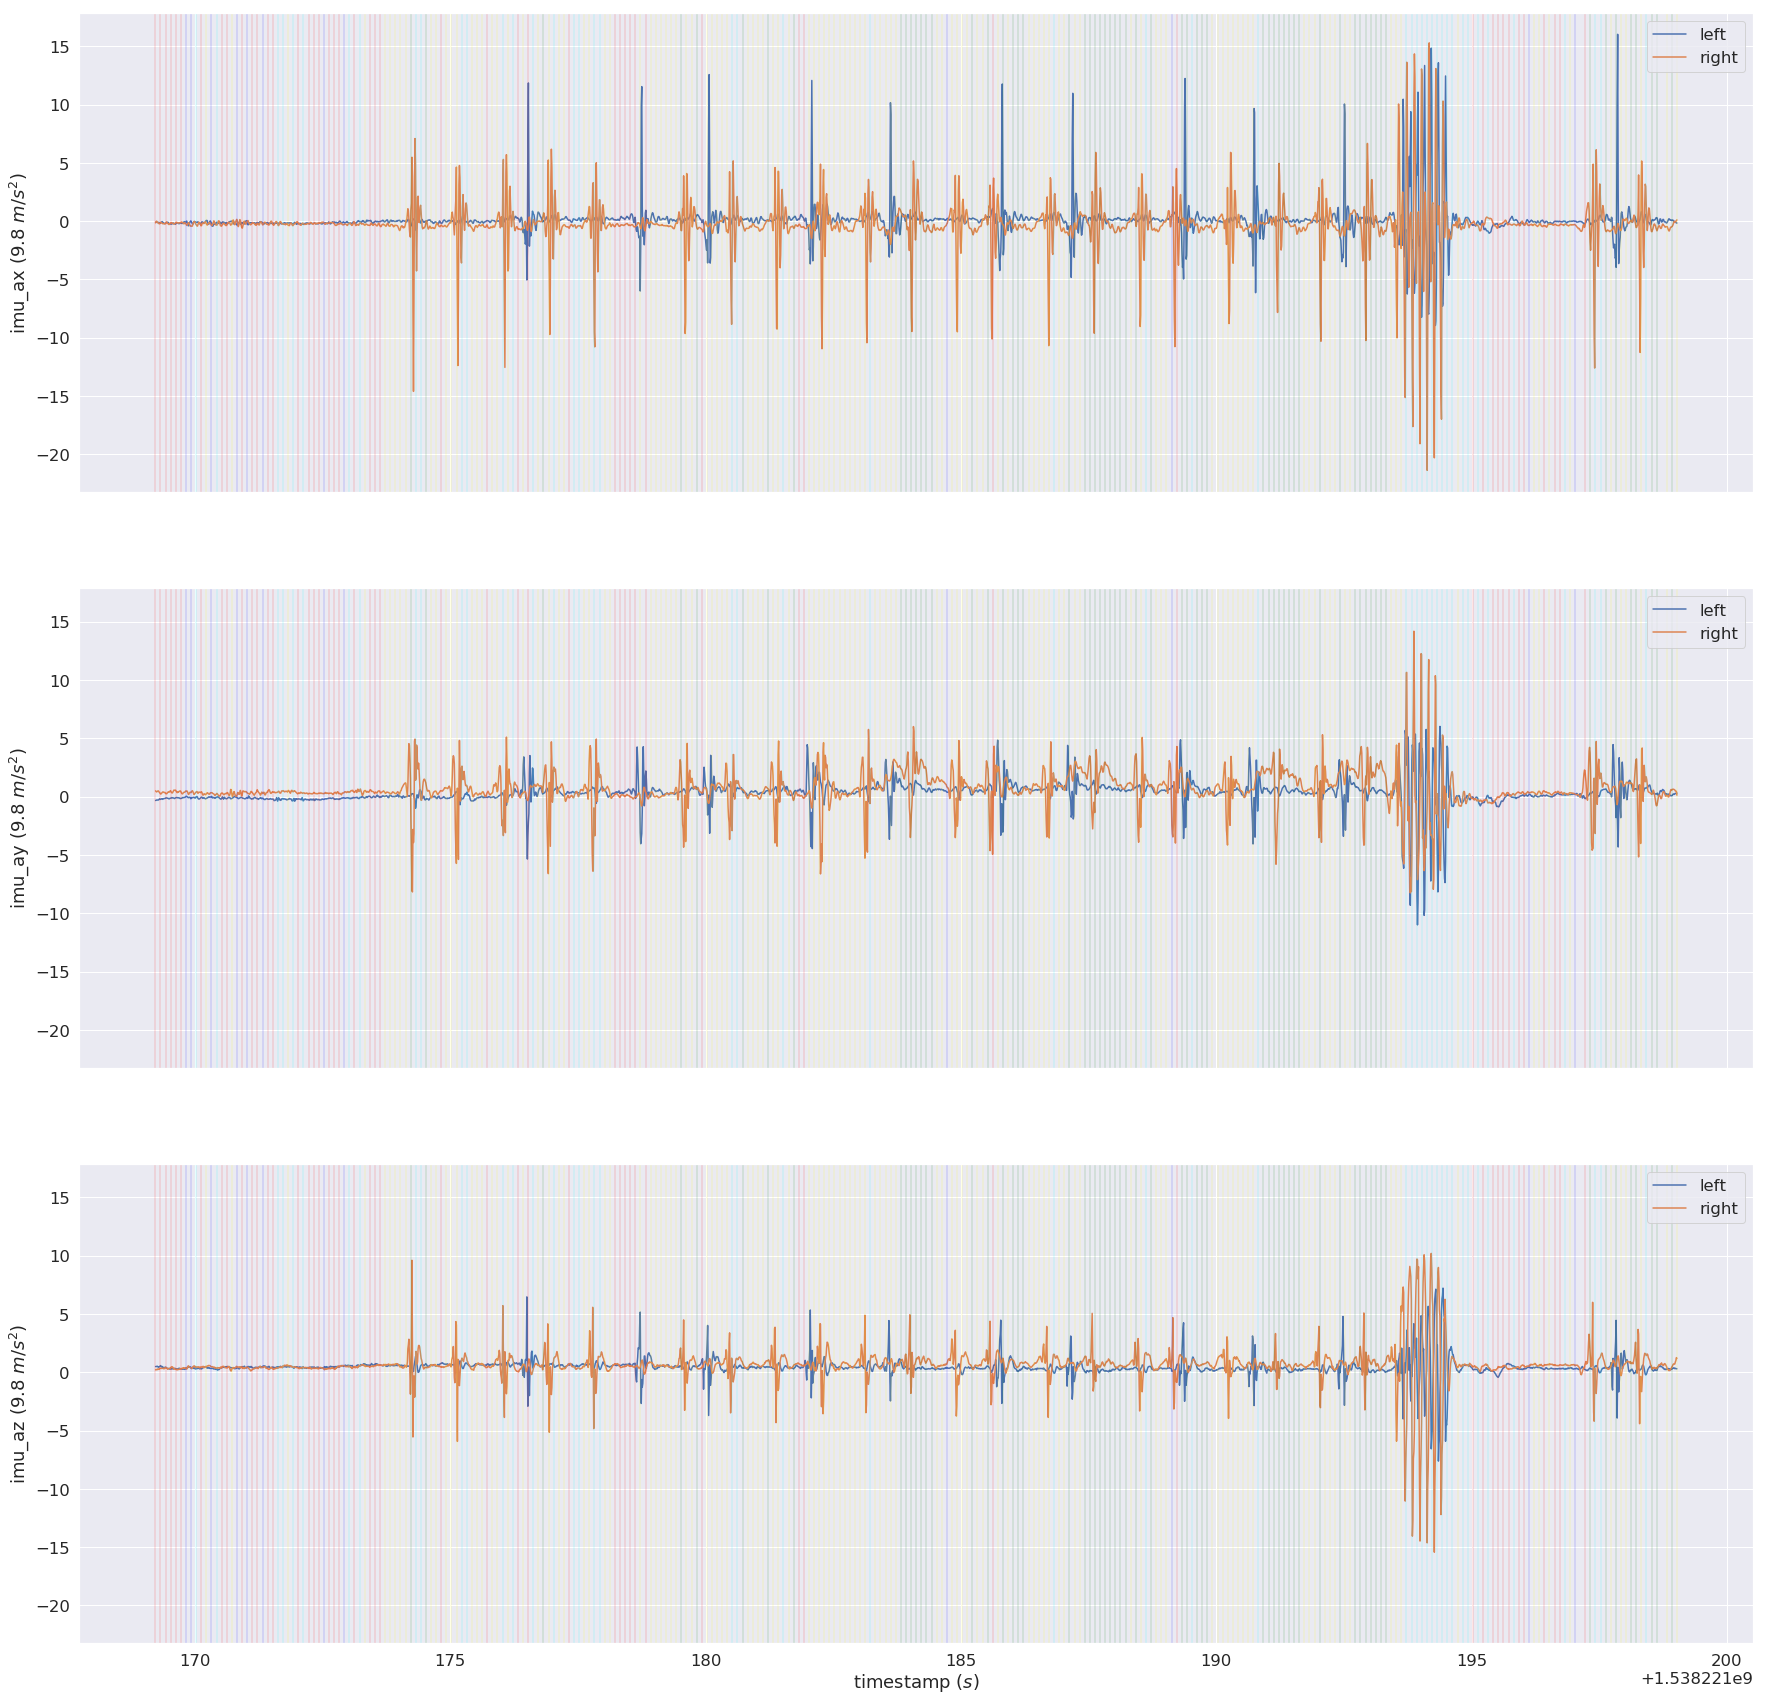

In [9]:
show_cols = tk.ZERO_ADJ_COL[:3]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
start_time = pred_df['timestamp'].iloc[0]
end_time = pred_df['timestamp'].iloc[-1]

left_df = play.play_dict['L']
left_df = left_df[(left_df['timestamp'] >= start_time) & (left_df['timestamp'] <= end_time)]

right_df = play.play_dict['R']
right_df = right_df[(right_df['timestamp'] >= start_time) & (right_df['timestamp'] <= end_time)]

for i_, col in enumerate(show_cols):
    sns.lineplot(data=left_df, x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=right_df, x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col + ' $(9.8\ m/s^2)$')
    for row_ in pred_df.values:
        event_time = float(row_[0])
        hit_type = int(row_[1])
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()

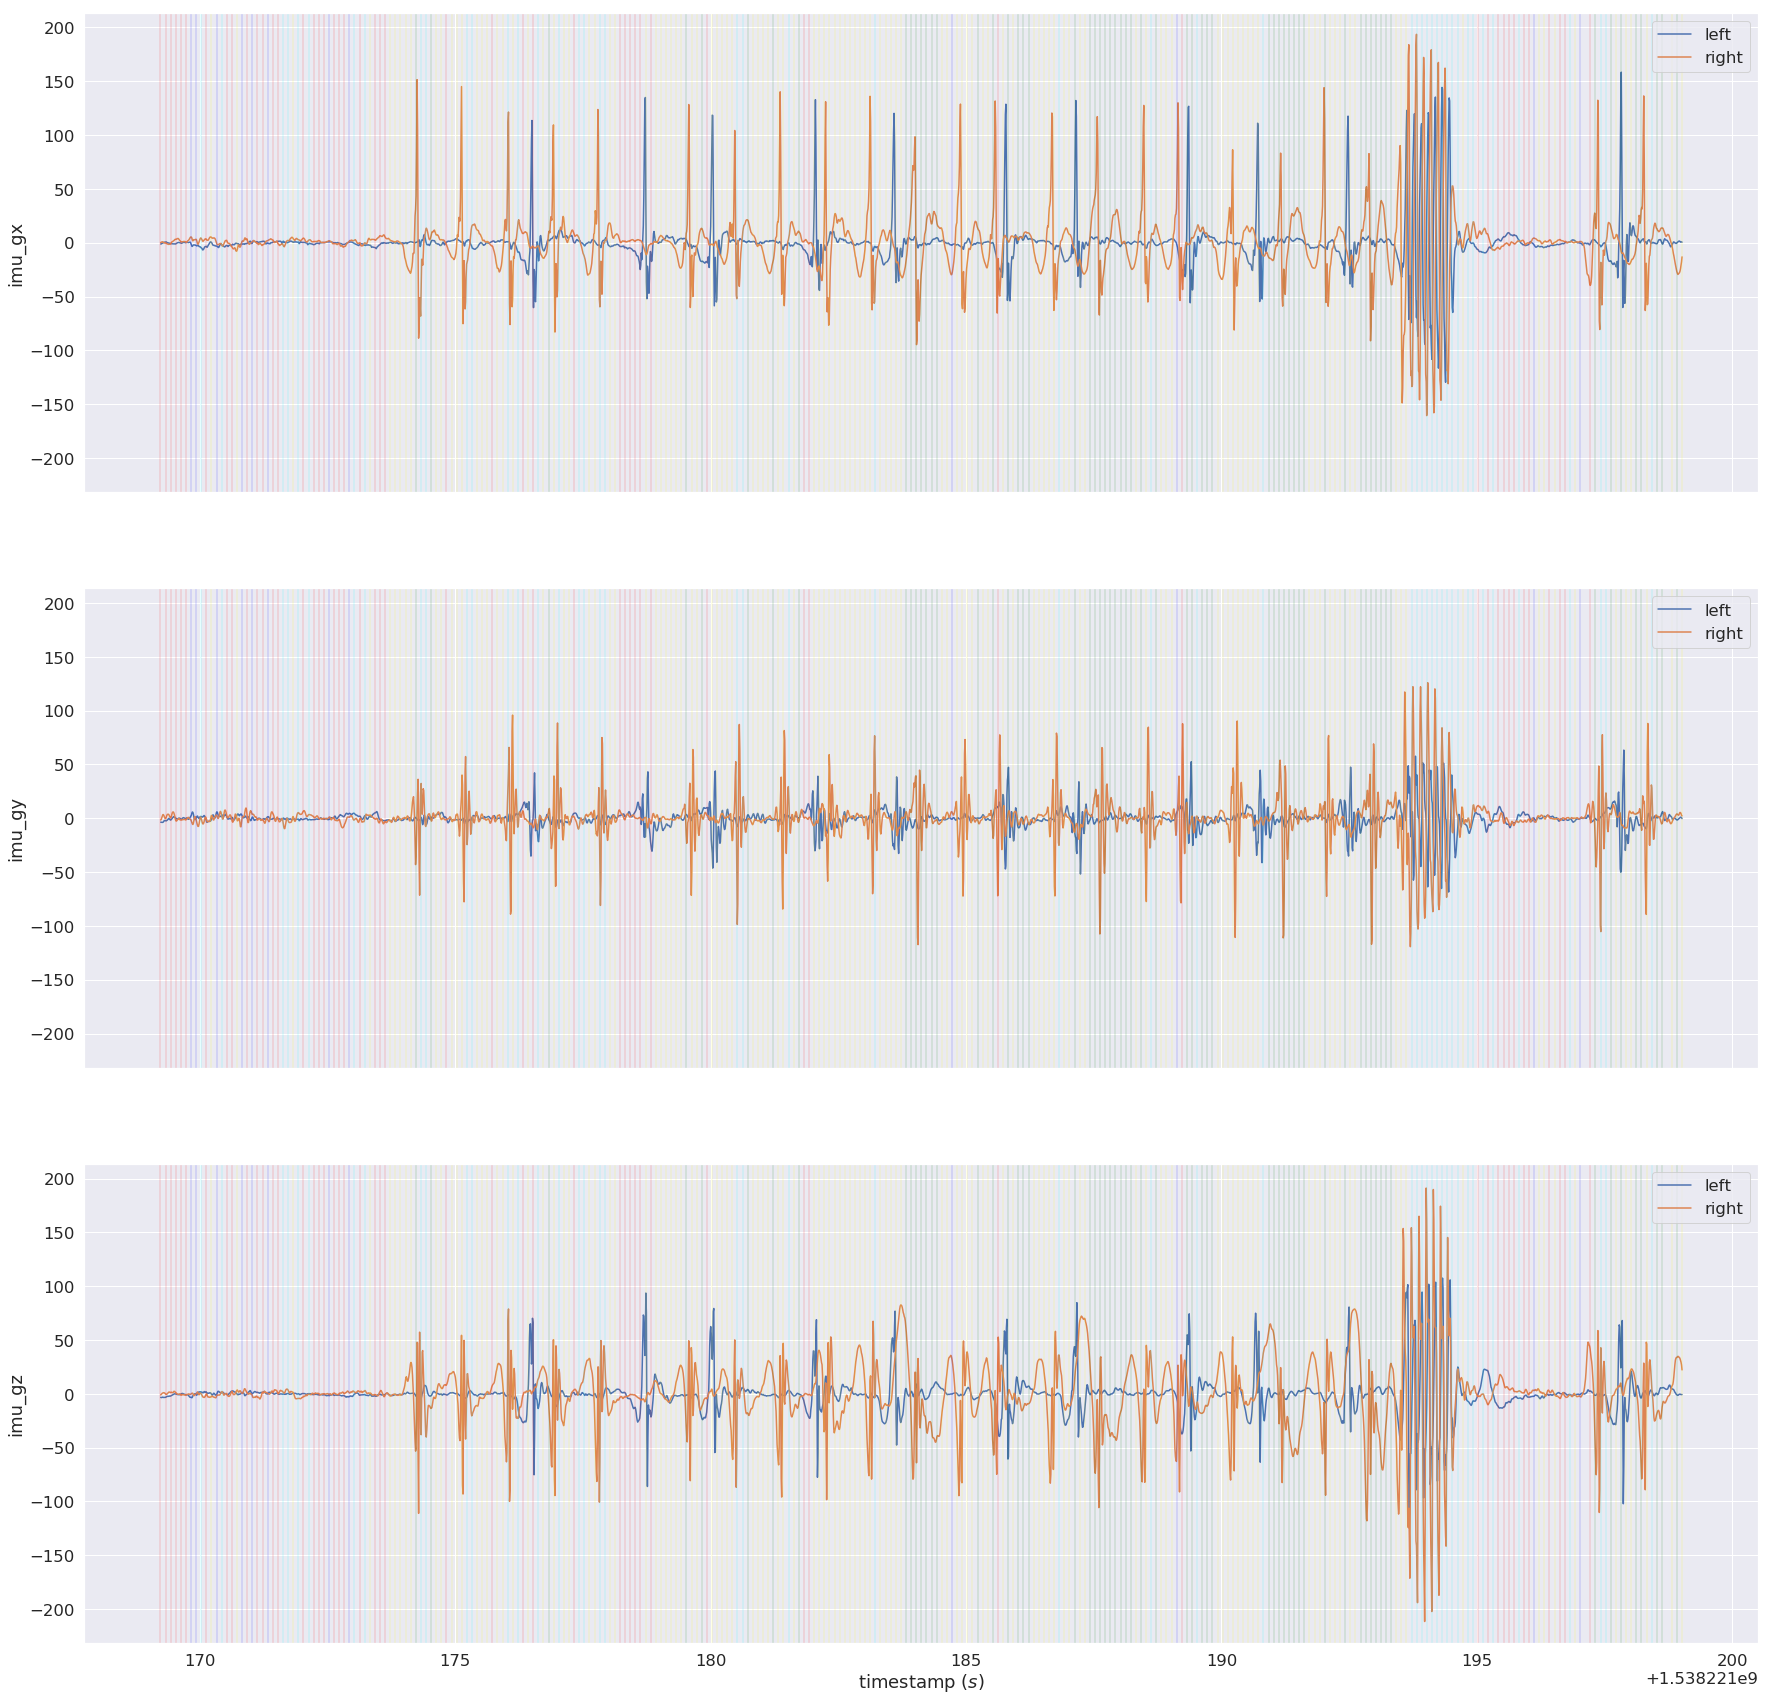

In [10]:
show_cols = tk.ZERO_ADJ_COL[3:6]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
start_time = pred_df['timestamp'].iloc[0]
end_time = pred_df['timestamp'].iloc[-1]

left_df = play.play_dict['L']
left_df = left_df[(left_df['timestamp'] >= start_time) & (left_df['timestamp'] <= end_time)]

right_df = play.play_dict['R']
right_df = right_df[(right_df['timestamp'] >= start_time) & (right_df['timestamp'] <= end_time)]

for i_, col in enumerate(show_cols):
    sns.lineplot(data=left_df, x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=right_df, x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col)
    for row_ in pred_df.values:
        event_time = float(row_[0])
        hit_type = int(row_[1])
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()